## Homework 3

You will have to submit the following two completed ipython notebooks for this homework.

1. PCA_analysis
2. Reconstruction

In [1]:
# Name: Rakshit Wadhwa
# Email: rawadhwa@ucsd.edu
# PID: A53100056

In [3]:
%pylab inline
# data_dir = "./Data/Weather/"
data_dir = "../../Data/Weather/"

Populating the interactive namespace from numpy and matplotlib


### Downloading Pickled data from S3
If `STAT.pickle` is not in the directory, get it using the following command

In [ ]:
!curl -o $data_dir/STAT.pickle http://mas-dse-open.s3.amazonaws.com/Weather/STAT.pickle

### Get the statistics from the Pickle File

In [4]:
import pickle
STAT,STAT_description=pickle.load(open(data_dir+'/STAT.pickle','r'))

In [5]:
STAT.keys()

['TMIN', 'TOBS', 'TMAX', 'SNOW', 'SNWD', 'PRCP']

In [6]:
STAT_description

[('SortedVals',
  'Sample of values',
  'vector whose length varies between measurements'),
 ('UnDef',
  'sample of number of undefs per row',
  'vector whose length varies between measurements'),
 ('mean', 'mean value', ()),
 ('std', 'std', ()),
 ('low100', 'bottom 1%', ()),
 ('high100', 'top 1%', ()),
 ('low1000', 'bottom 0.1%', ()),
 ('high1000', 'top 0.1%', ()),
 ('E', 'Sum of values per day', (365,)),
 ('NE', 'count of values per day', (365,)),
 ('Mean', 'E/NE', (365,)),
 ('O', 'Sum of outer products', (365, 365)),
 ('NO', 'counts for outer products', (365, 365)),
 ('Cov', 'O/NO', (365, 365)),
 ('Var', 'The variance per day = diagonal of Cov', (365,)),
 ('eigval', 'PCA eigen-values', (365,)),
 ('eigvec', 'PCA eigen-vectors', (365, 365))]

In [7]:
Scalars=['mean','std','low1000','low100','high100','high1000']
for meas in STAT.keys():
    !grep $meas '../Data/Weather/ghcnd-readme.txt'
    S=STAT[meas]
    for scalar in Scalars:
        print '%s:%f'%(scalar,S[scalar]),
    print

grep: ../Data/Weather/ghcnd-readme.txt: No such file or directory
mean:44.531018 std:109.933072 low1000:-350.000000 low100:-245.000000 high100:239.000000 high1000:278.000000
grep: ../Data/Weather/ghcnd-readme.txt: No such file or directory
mean:113.582223 std:119.255224 low1000:-267.000000 low100:-167.000000 high100:339.000000 high1000:389.000000
grep: ../Data/Weather/ghcnd-readme.txt: No such file or directory
mean:175.823101 std:123.742076 low1000:-233.000000 low100:-122.000000 high100:383.000000 high1000:433.000000
grep: ../Data/Weather/ghcnd-readme.txt: No such file or directory
mean:2.126900 std:24.160393 low1000:0.000000 low100:0.000000 high100:76.000000 high1000:254.000000
grep: ../Data/Weather/ghcnd-readme.txt: No such file or directory
mean:21.454498 std:123.727039 low1000:0.000000 low100:0.000000 high100:508.000000 high1000:1676.000000
grep: ../Data/Weather/ghcnd-readme.txt: No such file or directory
mean:24.277398 std:100.174134 low1000:0.000000 low100:0.000000 high100:356.0

### Script for plotting yearly plots 

In [8]:
def YearlyPlots(T,ttl='',yl='',xl='',y=None,x=None,size=(10,7), c=None):
    yearday=[i for i in range(1,366)]
    fig=figure(1,figsize=size,dpi=300)
    if shape(T)[0] != 365:
        raise ValueError("First dimension of T should be 365. Shape(T)="+str(shape(T)))
    if c is not None:
        plot_date(yearday,T, '-',color=c);
    else:
        plot_date(yearday,T, '-', );
    # rotate and align the tick labels so they look better
    #fig.autofmt_xdate()
    ylabel(yl)
    xlabel(xl)
    if y is not None:
        ylim(y)
    if x is not None:
        xlim(x)
    grid()
    title(ttl)

### Plot the following 3 plots for each measurement:

1. A histogram from the sample values (from SortedVals) restricted between low100 and high100 (By which we mean that any value larger or equal to low100 and smaller or equal to high100 is included).
2. Plot of mean and mean $\pm$ std
3. Number of measurements recorded each day

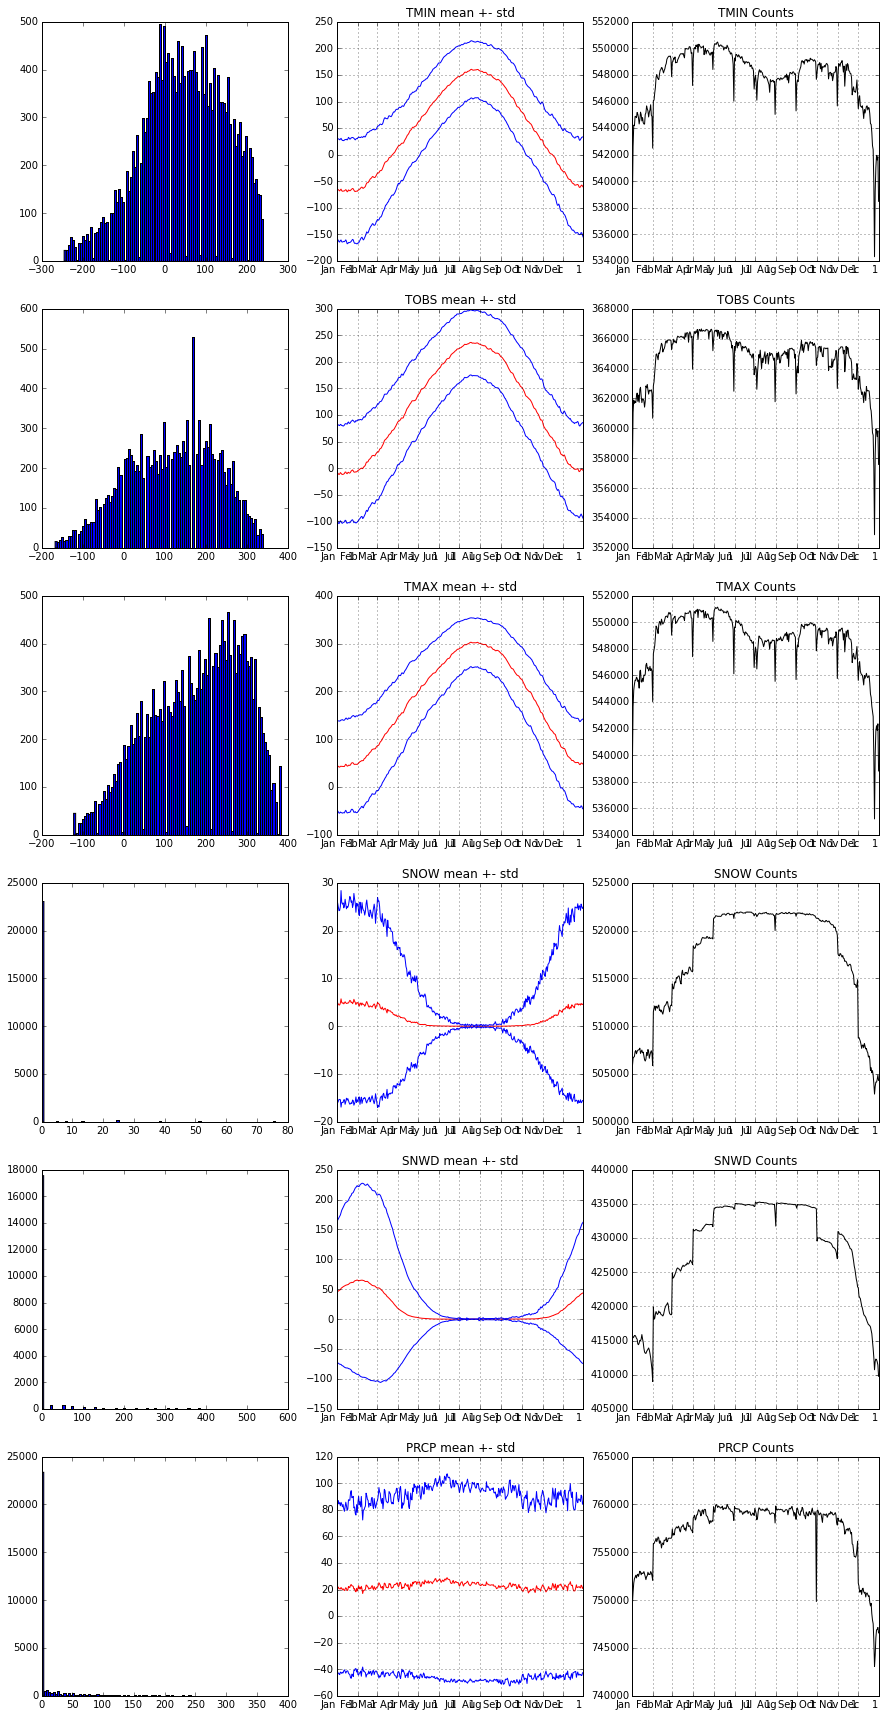

In [9]:
figure(figsize=(15,30))
offset=1
for meas in STAT.keys():
    subplot(6,3,offset)
    offset+=1
    ## Your code for Histogram
    low100 =  STAT[meas]['low100']
    high100 = STAT[meas]['high100']
    sortedVals  = filter(lambda x: x >= low100 and x <= high100, STAT[meas]['SortedVals'])
    hist(sortedVals,bins=100)
    subplot(6,3,offset)
    offset+=1
    ## Your code for mean and mean +- std
    v_mean = STAT[meas]['Mean']
    v_var = STAT[meas]['Var']
    v_plus = v_mean + sqrt(v_var)
    v_minus = v_mean - sqrt(v_var)
    YearlyPlots(v_mean,ttl=meas+' mean +- std',c = 'r')
    YearlyPlots(v_plus,ttl=meas+' mean +- std',c = 'b')
    YearlyPlots(v_minus,ttl=meas+' mean +- std',c = 'b')
    
    subplot(6,3,offset)
    offset+=1
    YearlyPlots(STAT[meas]['NE'],ttl=meas + ' Counts',yl='',xl='',y=None,x=None,size=(10,7), c = 'k')

    
    ## Your code for number of measurements

### Plot the Number of measurements recorded each day for TMAX

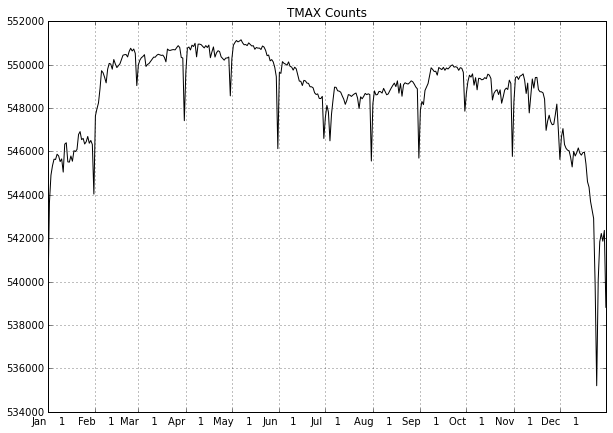

In [9]:
## Your code here
YearlyPlots(STAT['TMAX']['NE'],ttl='TMAX Counts',yl='',xl='',y=None,x=None,size=(10,7), c = 'k')


### Extra Credit
* Can you figure out what is the reason for these lower counts (especially at the beginning and end of the year and also the sudden dip at the end of each month)? Is it restricted to a subset of the stations? Suggest a way to remove this effect.

* Can you Explain the counts per day for "SNWD" ?

Provide your explanation in new markdown cells appended after this cell. Support your explanation
using code cells and graphs. If you need more data that is available only in the full dataset in the cloud but not in the data you have downloaded, contact your TA.


In [23]:
## TMAX (analysis done using data for sample stations i.e. SampleStations.pickle)
#Hence for TMAX we can see that around 29 stations of the stations in sample station data 
#consistently don't record data at month end, and seem to be mainly responsible for the dip we see at month end. 
#This could be due to maintenance or monthly shut down at these stations. The list of these stations are as follows:
#['USC00457015', 'USC00241518', 'CA007038350', 'USC00391049', 'USC00456215', 'USC00448062', 
# 'CA005021848', 'USC00131277', 'USC00422852', 'USS0008M07S', 'USC00207280', 'USC00011685', 'USC00243885'
# , 'CA004039000', 'CA007030310', 'USC00214989', 'USC00010768', 'USC00428600', 'USC00160537', 'USC00043463'
# , 'USC00384886', 'CA007026612', 'USC00030536', 'CA001124110', 'USC00227252', 'USC00248488', 'USC00460580'
# , 'USC00350595', 'CA007024440']

## For year end and year start, we see that there have been decline in number of recording across all the stations.
## This could be attributed to holidays. From the sample data we don't see any particular stations
#specifically responsible for this.

#The analysis code is given below.

### Instructor's Feedback
It would have been nice if you wrote your explanation in markdown cells instead of as comments in code cells. 
The explanation you give for the end of the month dips is good, and you wrote some relevant code to identify these
stations. However, you did not show that, after removing the identified stations, the phenomenon is removed.

Extra credit: 20 points.

In [24]:
## SNWD (analysis done using data for sample stations i.e. SampleStations.pickle)
#The decrease in SNWD Counts directly follows from the increase in the SNOW count. This can be checked from the 
## SNWD Counts and SNOW plot, plotted from the sample data. Hence it is safe to assume that as it snows more, 
#it becomes increasingly difficult to capture snow depth.
## From the quantative analysis, it is found that around 33 stations of the sample stations data show this effect
## very evidently, and so it must be because it snows a lot in those stations, which justifies the shapes of the plots.

In [25]:
Data=pickle.load(open('../../Data/Weather/SampleStations.pickle','r'))
FlatData=[]
for station in Data:
    stationname=station[0]
    for measurements in station[1]:
        measurement,year=measurements[0]
        yeardata=list(measurements[1])
        rowData=[stationname]+[measurement]+[year]+yeardata
        FlatData.append(rowData)
import pandas as pd

frameheader=['station','measurement','year']+range(1,366)
df=pd.DataFrame(FlatData,columns=frameheader)

m_df={}
for m in ['TMIN', 'TOBS', 'TMAX', 'SNOW', 'SNWD', 'PRCP']:
    t_df=df[df['measurement']==m]
    m_df[m]=t_df  

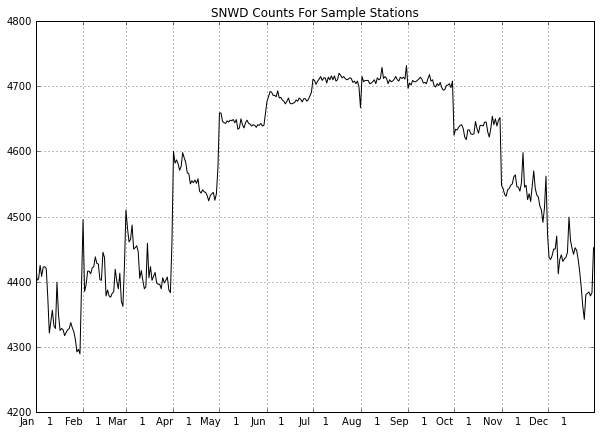

In [26]:
m_old2  = np.matrix(m_df['SNWD'].iloc[:,3:])
m_old2 = 1  - np.isnan(m_old2)
m_count2 = np.sum(m_old2, axis = 0)
# print shape(m_count)
YearlyPlots(m_count2.T,ttl='SNWD Counts For Sample Stations',yl='',xl='',y=None,x=None,size=(10,7), c = 'k')


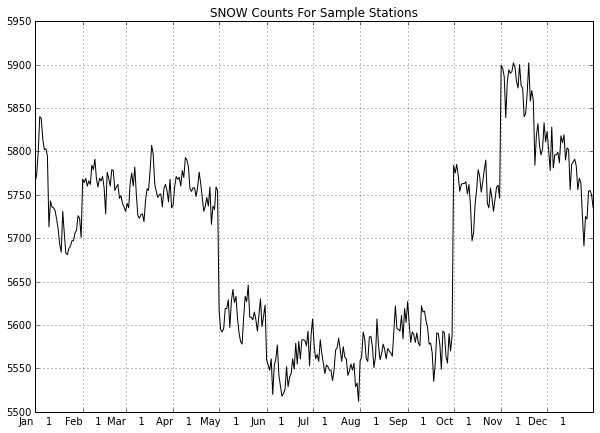

In [27]:
m_old  = np.matrix(m_df['SNOW'].iloc[:,3:])
m_old = 1  - np.isnan(m_old)
m_count = np.sum(m_old, axis = 0)
YearlyPlots(m_count.T,ttl='SNOW Counts For Sample Stations',yl='',xl='',y=None,x=None,size=(10,7), c = 'k')


In [28]:
##Monthly and yearly initialization
stationsList = []
for station in Data:
    stationname=station[0]
    if (stationname not in stationsList):
        stationsList.append(stationname)
mid = [15, 46, 74, 105, 135, 166, 196, 227, 258, 288, 319, 349]
end = [31, 59, 90, 120, 151, 181, 212, 243, 273, 304, 334, 365]
yearstart = range(1,41)
yearend = range(341,361)
yearList = yearstart + yearend
yearMid = range(180,241)
listYear0 = [0]*60
listMonth0 = [0]*12

In [29]:
##Monthly dip analysis for TMAX
stationMonths = []
j = 0
for stationN in stationsList:
    m_old  = np.matrix(m_df['TMAX'].query('station == @stationN').iloc[:,3:])
    m_old = 1  - np.isnan(m_old)
    m_old = np.sum(m_old, axis = 0).T
    months_diff = []
    for i in range(0,12):
        months_diff.append(int(m_old[end[i] - 1]) - int(m_old[mid[i] - 1]))
    if (months_diff != listMonth0):
        count = 0
        for elem in months_diff:
            if (elem < 0):
                count += 1
        stationMonths.append((count, stationN))

shutdown_count = 0
shutdown_list  = []
for (c, s) in stationMonths:
    if (c >= 6):
        shutdown_list.append(s)
        shutdown_count += 1
print "Number of stations with mostly missing month end readings ", shutdown_count
print "Stations with mostly missing month end readings are ", (shutdown_list)

Number of stations with mostly missing month end readings  29
Stations with mostly missing month end readings are  ['USC00457015', 'USC00241518', 'CA007038350', 'USC00391049', 'USC00456215', 'USC00448062', 'CA005021848', 'USC00131277', 'USC00422852', 'USS0008M07S', 'USC00207280', 'USC00011685', 'USC00243885', 'CA004039000', 'CA007030310', 'USC00214989', 'USC00010768', 'USC00428600', 'USC00160537', 'USC00043463', 'USC00384886', 'CA007026612', 'USC00030536', 'CA001124110', 'USC00227252', 'USC00248488', 'USC00460580', 'USC00350595', 'CA007024440']


In [32]:
#Yearly analysis for snow depth
yearDiffList = []
j = 0

for stationN in stationsList:
    yearEndCount = 0
    yearMidCount = 0
    m_old  = np.matrix(m_df['SNWD'].query('station == @stationN').iloc[:,3:])
    m_old = 1  - np.isnan(m_old)
    m_old = np.sum(m_old, axis = 0).T
    months_diff = []
    for i in range(0,60):
        yearEndCount += int(m_old[yearList[i] - 1])
    for i in range(0,60):
        yearMidCount += int(m_old[yearMid[i] - 1])
    yearDiff =  yearEndCount - yearMidCount
    if(yearDiff != 0):
        yearDiffList.append((yearDiff, stationN))
cYear  = 0
for (d, c) in yearDiffList:
    if(d < -300 ):
        cYear += 1
print "Number of stations with high dip in count at end year and start (till Feb)", cYear

Number of stations with high dip in count at end year and start (till Feb) 33


### Plot the following 3 plots for each measurement:

1. The percentage of variance explained by top-k eigen vectors for k between 1 to 9
2. Plot of mean and mean $\pm$ std
3. Plot of top 3 eigenvectors

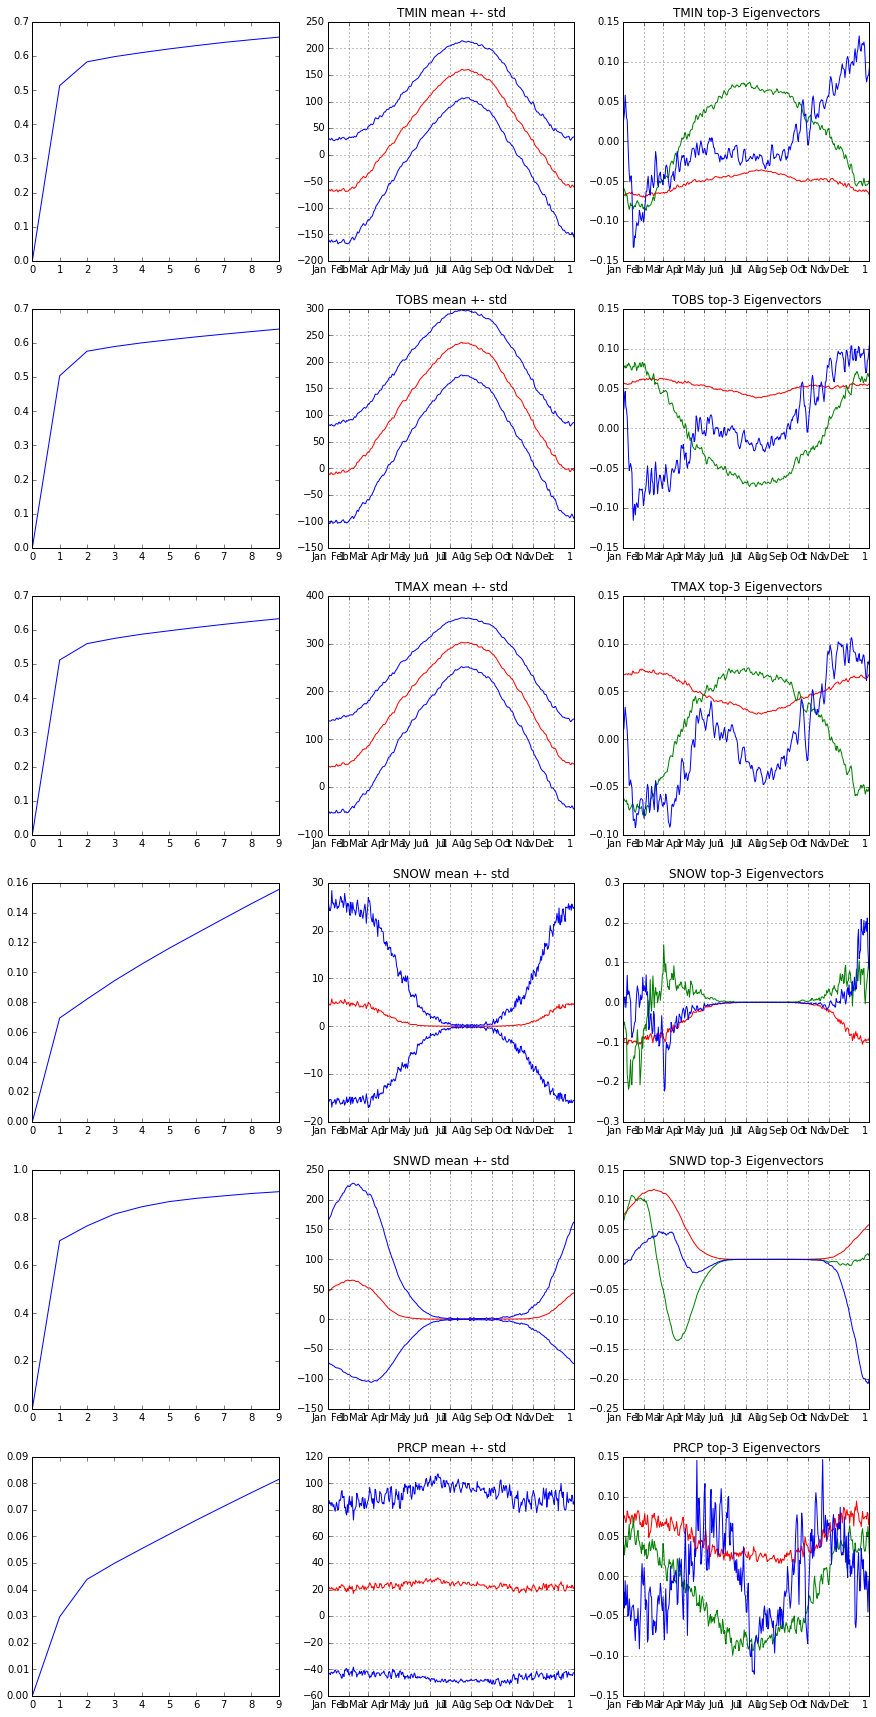

In [31]:
figure(figsize=(15,30))
offset=1
for meas in STAT.keys():
    subplot(6,3,offset)
    offset+=1
    ## Your code for percentage of variance explained
    totVariance =  sum(STAT[meas]['eigval'])
    Var = []
    for i in range(0,10):
        Var.append(sum(STAT[meas]['eigval'][:i])/totVariance)
    vecs=[i for i in range(0,10)]
    plot(vecs,Var, '-');
    
    subplot(6,3,offset)
    offset+=1
    ## Your code for mean and mean +- std
    v_mean = STAT[meas]['Mean']
    v_var = STAT[meas]['Var']
    v_plus = v_mean + sqrt(v_var)
    v_minus = v_mean - sqrt(v_var)
    YearlyPlots(v_mean,ttl=meas+' mean +- std',c = 'r')
    YearlyPlots(v_plus,ttl=meas+' mean +- std',c = 'b')
    YearlyPlots(v_minus,ttl=meas+' mean +- std',c = 'b')
    subplot(6,3,offset)
    offset+=1
    ## Your code for top-3 eigenvectors
    YearlyPlots( STAT[meas]['eigvec'][:,0],ttl=meas + ' top-3 Eigenvectors', c = 'r')
    YearlyPlots( STAT[meas]['eigvec'][:,1],ttl=meas + ' top-3 Eigenvectors', c  = 'g')
    YearlyPlots( STAT[meas]['eigvec'][:,2],ttl=meas + ' top-3 Eigenvectors',c = 'b')


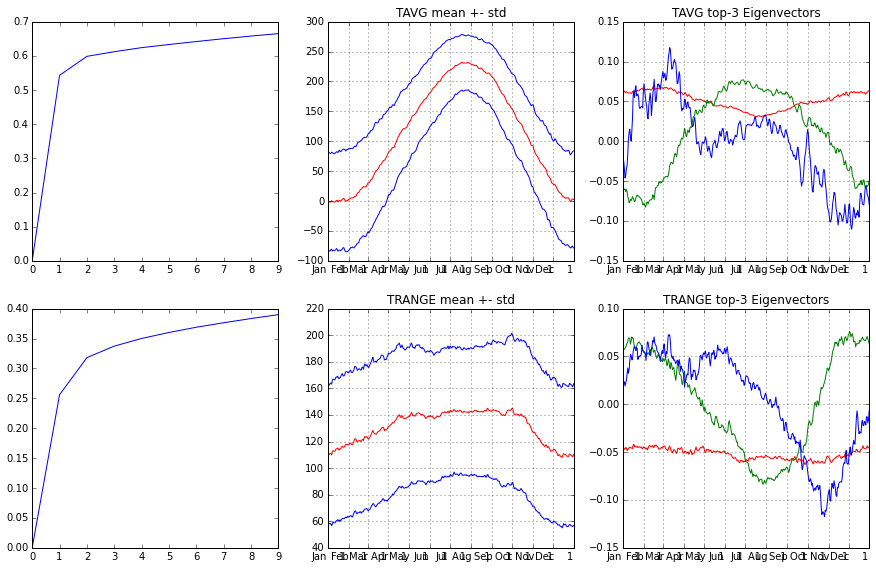

In [10]:
STAT,STAT_description=pickle.load(open('../../Data/Weather/STAT_TAVG_RANGE.pickle','r'))
figure(figsize=(15,30))
offset=1
for meas in STAT.keys():
    subplot(6,3,offset)
    offset+=1
    ## Your code for percentage of variance explained
    totVariance =  sum(STAT[meas]['eigval'])
    Var = []
    for i in range(0,10):
        Var.append(sum(STAT[meas]['eigval'][:i])/totVariance)
    vecs=[i for i in range(0,10)]
    plot(vecs,Var, '-');
    
    subplot(6,3,offset)
    offset+=1
    ## Your code for mean and mean +- std
    v_mean = STAT[meas]['Mean']
    v_var = STAT[meas]['Var']
    v_plus = v_mean + sqrt(v_var)
    v_minus = v_mean - sqrt(v_var)
    YearlyPlots(v_mean,ttl=meas+' mean +- std',c = 'r')
    YearlyPlots(v_plus,ttl=meas+' mean +- std',c = 'b')
    YearlyPlots(v_minus,ttl=meas+' mean +- std',c = 'b')
    subplot(6,3,offset)
    offset+=1
    ## Your code for top-3 eigenvectors
    YearlyPlots( STAT[meas]['eigvec'][:,0],ttl=meas + ' top-3 Eigenvectors', c = 'r')
    YearlyPlots( STAT[meas]['eigvec'][:,1],ttl=meas + ' top-3 Eigenvectors', c  = 'g')
    YearlyPlots( STAT[meas]['eigvec'][:,2],ttl=meas + ' top-3 Eigenvectors',c = 'b')
